<a href="https://colab.research.google.com/github/inaldoeleuterio/analise_ouvidoria_digital_fotal_2021/blob/main/odf2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manifestações da ouvidoria digital 2021 da cidade de Fortaleza:<br>uma breve análise

INTRODUÇÃO 

A Ouvidoria Digital de Fortaleza é uma instância de participação e controle social que permite identificar melhorias para a gestão e serviços públicos. Ela se disponhe a ser o canal de interação para falar sobre os serviços municipais.

Neste notebook iremos realizar uma análise exploratória sobre alguns aspectos dos dados disponibilizados pelo site [Dados Abertos Fortaleza](https://dados.fortaleza.ce.gov.br/) referente ao ano de 2021.

In [1]:
# Importa bibliotecas para lidar com o sistema
import requests
import os

# Importa bibliotecas numéricas e de manipulação de matrizes
import numpy as np
import pandas as pd

# Importa a biblioteca gráfica básica e definindo parâmetros para grid vertical
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = 'both'
plt.rcParams['xtick.minor.visible'] = True

# Biblioteca apenas para ignorar avisos afim de evitar poluição visual
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Função para baixar o arquivo do site a ser analisado
url_arq = 'https://dados.fortaleza.ce.gov.br/dataset/c45e4366-4ba7-4c6c-8d46-ce1a64f61f90/resource/b6a36cbe-9454-4103-87c6-d4f1162ede8d/download/dados_abertos_ouvidoria_2021.csv'

def obter_arq(url, end):

# A função verifica se já há um arquivo no diretório com o mesmo nome para que
# não baixe toda vez que for rodado, caso contrário, ele baixa novamente.
    if os.path.isfile('mani_ouv_fortal_2021.csv'): 
        print('Dados já foram carregados.')
    else:
        res = requests.get(url)
        if res.status_code == requests.codes.OK:
            with open(end, 'wb') as arquivo:
                arquivo.write(res.content)
            print(f'Arquivo baixado em {end}')    
        else:
            res.raise_for_status()

if __name__ == '__main__':
    obter_arq(url_arq, 'mani_ouv_fortal_2021.csv')


Dados já foram carregados.


In [3]:
# Utilizamos o método .head() e o .info para termos uma visão geral dos dados
data = pd.read_csv('mani_ouv_fortal_2021.csv')
data.head()

,manifestacao,data_abertura,data_resposta,periodo_atendimento_em_dias,anonimo,tipo_manifestacao,orgao_sigla,orgao_nome,prioridade,meio_de_atendimento,bairro,regional,assuntos,sub_assuntos,status_manifestacao,prazo_legal,dias_em_atraso,situacao_manifestacoes,compete_poder_municipal
0,1808,04/01/2021 04:28:39,14/04/2021 07:53:28,100.0,Não,Reclamação,SEFIN,SECRETARIA MUNICIPAL DAS FINANÇAS,Baixa,Internet,NaN,NaN,ISS Pessoa Jurídica,NaN,Em Finalizada,15/02/2021,0,Em Finalizado com Atraso,Não
1,1809,04/01/2021 08:24:46,22/09/2021 16:15:40,261.0,Não,Reclamação,SER VI,SECRETARIA REGIONAL VI,Alta,Presencial,BARROSO,Regional IX,Esgoto Clandestino,NaN,Em Finalizada,15/02/2021,0,Em Finalizado com Atraso,Não
2,1810,04/01/2021 08:30:14,04/01/2021 12:20:43,0.0,Sim,Solicitação de informação,AGEFIS,AGÊNCIA DE FISCALIZAÇÃO DE FORTALEZA,Média,Telefone,GRANJA PORTUGAL,Regional V,Fiscalização,NaN,Em Finalizada,15/02/2021,0,Em Finalizado sem Atraso,Não
3,1811,04/01/2021 08:32:41,04/01/2021 08:33:43,0.0,Sim,Solicitação de informação,AGEFIS,AGÊNCIA DE FISCALIZAÇÃO DE FORTALEZA,Média,Telefone,NaN,NaN,Informações/Atendimento,Teleatendimento,Em Finalizada,15/02/2021,0,Em Finalizado sem Atraso,Não
4,1812,04/01/2021 09:17:30,02/06/2021 11:49:55,149.0,Sim,Reclamação,SER I,SECRETARIA REGIONAL I,Média,Email,NaN,NaN,Informações/Atendimento,NaN,Em Finalizada,15/02/2021,0,Em Finalizado com Atraso,Não


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28357 entries, 0 to 28356
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   manifestacao                 28357 non-null  int64  
 1   data_abertura                28357 non-null  object 
 2   data_resposta                27867 non-null  object 
 3   periodo_atendimento_em_dias  28357 non-null  float64
 4   anonimo                      28357 non-null  object 
 5   tipo_manifestacao            28357 non-null  object 
 6   orgao_sigla                  28357 non-null  object 
 7   orgao_nome                   28357 non-null  object 
 8   prioridade                   28357 non-null  object 
 9   meio_de_atendimento          28357 non-null  object 
 10  bairro                       13781 non-null  object 
 11  regional                     13691 non-null  object 
 12  assuntos                     28335 non-null  object 
 13  sub_assuntos    

## Perguntas a serem feitas

Analisando as características(features) demonstradas no método .info() percebemos algumas abordagens que podemos realizar:<br>
1 - Qual mês houve mais ocorrências?<br>
2 - Qual orgão é mais demandado?<br>
3 - Como os cidadãos e cidadãs demandam esses atendimentos?<br>
4 - Quão eficiente é a reposta para com o atendimento?

In [5]:
# Criando um dataframe a partir dos dados originais para termos como referência nas análises.
df = data.copy()

1 - QUAL MÊS HOUVE MAIS OCORRÊNCIAS?

In [6]:
# Dataframe específico para se trabalhar a resposta em questão: lembrando que iremos apenas contar os números de ocorrência por mês.
# Nesta questão em específico, iremos apenas precisar das datas das ocorrências e de alguma feature que as referencie, no caso, 'manifestacao'.
# Por fim eliminamos as linhas sem valores.
df_ocorrencia = df.copy()[['manifestacao', 'data_abertura']].dropna()

# Cria-se uma nova coluna apenas com mês e ano derivada da coluna 'data_abertura' transformada em datetime e filtrada por mês.
df_ocorrencia['data_mes'] = pd.to_datetime(df['data_abertura']).dt.to_period('M')
# Definimos a nova coluna como index e dropamos a coluna que não precisamos mais: 'data_abertura'.
df_ocorrencia = df_ocorrencia.set_index('data_mes')
df_ocorrencia = df_ocorrencia.drop('data_abertura', 1)

# Utilizamos o método .resample(), que é uma espécie de .groupby() só que para df's com data como index, com o objetivo de somar o número
# de ocorrências por mês.
df_ocorrencia = df_ocorrencia.resample('M')['manifestacao'].count()

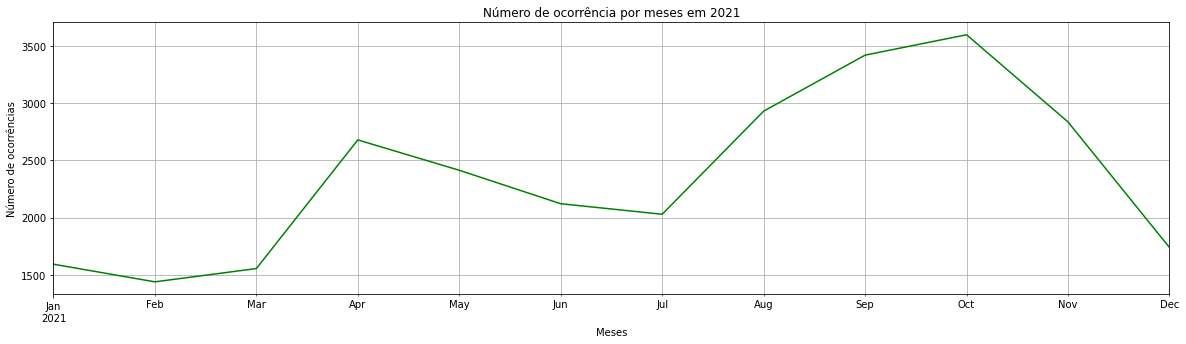

In [7]:
# Plotagem do resultado
df_ocorrencia.plot(kind='line',
                   figsize = (20, 5),
                   color=['green'],
                   grid=True,
                   title='Número de ocorrência por meses em 2021',
                   xlabel='Meses',
                   ylabel='Número de ocorrências')

Através da visualiação do gráfico onde o número de ocorrências foi distribuído pelos meses durante o ano de 2021, podemos perceber que outubro foi o mês em que mais houve ocorrências na Ouvidoria Digital de Fortaleza.

2 - QUAL ÓRGÃO É O MAIS DEMANDADO?<br><br>
3 - COMO OS CIDADÃOS E CIDADÃS DEMANDAS ESSES ATENDIMENTOS?

As questões 2 e 3 são bastante semelhantes, de modo que podemos criar um dataframe único para fazer essas análises. É necessário apenas que escolhamos as *features* correspondentes e relevantes.

In [8]:
# Vamos criar um dataframe mais geral com o objetivo de englobar as 3 questões.
# 'orgao_nome' para a questão 2, 'assuntos' para questão 3 e  'meio_de_atendimento' para questão 4.
df_geral = df.copy()[['manifestacao', 'orgao_nome', 'meio_de_atendimento']]
df_geral.head()

,manifestacao,orgao_nome,meio_de_atendimento
0,1808,SECRETARIA MUNICIPAL DAS FINANÇAS,Internet
1,1809,SECRETARIA REGIONAL VI,Presencial
2,1810,AGÊNCIA DE FISCALIZAÇÃO DE FORTALEZA,Telefone
3,1811,AGÊNCIA DE FISCALIZAÇÃO DE FORTALEZA,Telefone
4,1812,SECRETARIA REGIONAL I,Email


Primeiro vamos contar o número de valores únicos que cada coluna possui.<br>
Isso irá nos ajudar a montar as plotagens, tendo em vista que pretendemos raquear os maiores valores.

In [9]:
print(f'Número de órgãos no orgao_nome: {np.count_nonzero(df_geral.orgao_nome.unique())}')
print(f'Número de meio de atendimento no meio_de_atendimento: {np.count_nonzero(df_geral.meio_de_atendimento.unique())}')

Número de órgãos no orgao_nome: 52
Número de meio de atendimento no meio_de_atendimento: 9


Podemos verificar que a coluna orgao_nome possui 52 órgãos diferentes.<br> É de boa prática, então, que filtremos os órgãos com maiores valores.

ÓRGÃOS

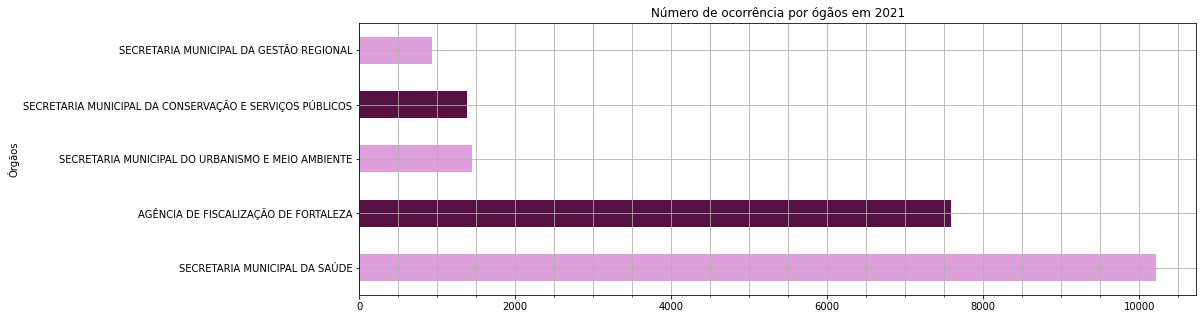

In [10]:
# Verificando a ocorrência de um valor em determinada coluna com .value_counts().
# Iremos pegar apenas os órgãos e meios de atendimento que contém os 5 maiores números de ocorrência.
df_geral.orgao_nome.value_counts()[:5].plot(kind='barh',
                                            figsize = (15, 5),
                                            color=['#dda0dd', '#580f41'],
                                            title='Número de ocorrência por ógãos em 2021',
                                            xlabel='Órgãos',
                                            ylabel='Número de ocorrências')

MEIOS DE ATENDIMENTO

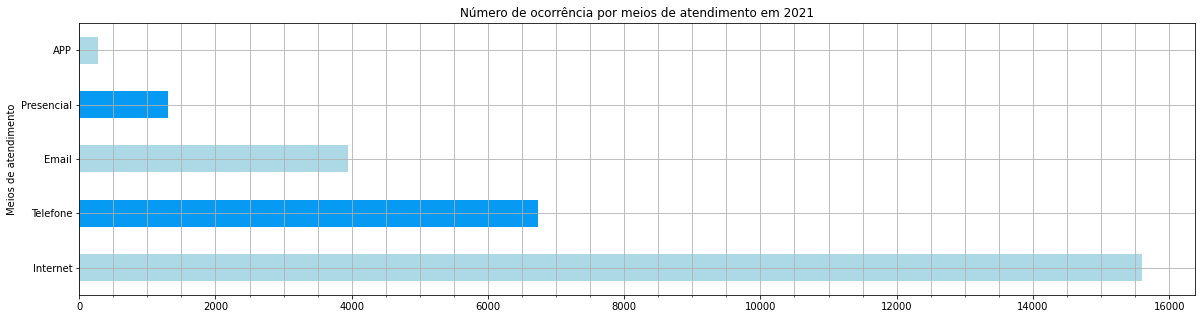

In [11]:
df_geral.meio_de_atendimento.value_counts()[:5].plot(kind='barh',
                                            figsize = (20, 5),
                                            color=['#add8e6', '#069af3'],
                                            title='Número de ocorrência por meios de atendimento em 2021',
                                            xlabel='Meios de atendimento',
                                            ylabel='Número de ocorrências')

Não há surpresa alguma que a Secretária de Saúde de Fortaleza seja o **orgão** mais ativado por meio da ouvidoria, já que, de acordo com o [IBGE](https://cidades.ibge.gov.br/brasil/ce/fortaleza/panorama), há 187 estabelecimentos municipais de saúde para abranger não apenas aprox. 2 milhões e 700 mil munícipes, como também moradores de outros municípios que têm a capital cearense como referência. A surpresa fica para a Secretaria de Educação, que apesar de possuir também uma enorme abrangência, não está entre o TOP 5.

Tratando-se dos **meios de atendimento** utilizados, nosso ranking apenas confirma a tendência da internet se consolidar como líder. A ouvidoria municipal possui um [portal próprio](https://ouvidoria.cgm.fortaleza.ce.gov.br/portal), facilitando mais o acesso dos usuários, relegando ao quarto lugar a manifestação presencial de alguma queixa.


4 - QUÃO EFICIENTE É A RESPOSTA PARA COM O ATENDIMENTO?

Para a pŕoxima questão trataremos sobre o tempo em que as solicitações são atendidas e se os atrasos são relevantes.

In [12]:
# Criar um dataframe com a data de abertura da demanda, da resposta e do prazo legal para resposta.
# Vamos utilizar o método .dropna() para apagar as linhas que cotenham alguma entrada nula, nivelando todo o dataframe.
df_efi = df.copy()[['manifestacao', 'data_abertura', 'data_resposta', 'prazo_legal']].dropna()

# Como iremos lidar com datas, vamos transformar as colunas de object para datetime. A coluna de data_abertura não será utilizada.
# O parâmetro dayfirst garante que o formato da data ficará correta.
df_efi['data_abertura'] = pd.to_datetime(df_efi['data_abertura'], dayfirst=True)
df_efi['data_resposta'] = pd.to_datetime(df_efi['data_resposta'], dayfirst=True)
df_efi['prazo_legal'] = pd.to_datetime(df_efi['prazo_legal'], dayfirst=True)

In [13]:
# Como a coluna 'prazo_legal', que serve como parâmetro para sabermos o limite da data de resposta, não tem horário, podemos retirar essa informação das demais.
df_efi['data_abertura'] = df_efi['data_abertura'].dt.date
df_efi['data_resposta'] = df_efi['data_resposta'].dt.date

In [14]:
# Com as colunas de datas devidamente formatadas, criaremos duas colunas: uma com o tempo de atraso, e outra apenas constando se atrasou ou não.
# Lembrando de converter em datetime novamente para trabalhar com aritmética porque quando utilizamos o método dt.date anteriormente, ele converteu o tipo
# para object(sring) novamente.
df_efi['tempo_atraso'] = pd.to_datetime(df_efi['data_resposta']) - pd.to_datetime(df_efi['prazo_legal'])
df_efi['em_atraso'] = (df_efi['tempo_atraso'] > '0 days').astype(int)

In [15]:
df_efi.head()

,manifestacao,data_abertura,data_resposta,prazo_legal,tempo_atraso,em_atraso
0,1808,2021-01-04,2021-04-14,2021-02-15,58 days,1
1,1809,2021-01-04,2021-09-22,2021-02-15,219 days,1
2,1810,2021-01-04,2021-01-04,2021-02-15,-42 days,0
3,1811,2021-01-04,2021-01-04,2021-02-15,-42 days,0
4,1812,2021-01-04,2021-06-02,2021-02-15,107 days,1


Para esta questão os valores positivos da feature 'tempo_atraso' são os dias que as demandas foram respondidas decorridos o prazo legal. Isto é, são os dias em atraso.

In [16]:
df_atr = df_efi.copy()
df_atr['data_abertura'] = pd.to_datetime(df_atr['data_abertura'])
df_atr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27867 entries, 0 to 28356
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   manifestacao   27867 non-null  int64          
 1   data_abertura  27867 non-null  datetime64[ns] 
 2   data_resposta  27867 non-null  object         
 3   prazo_legal    27867 non-null  datetime64[ns] 
 4   tempo_atraso   27867 non-null  timedelta64[ns]
 5   em_atraso      27867 non-null  int64          
dtypes: datetime64[ns](2), int64(2), object(1), timedelta64[ns](1)
memory usage: 1.5+ MB


Vamos analisar quantos atrasos houveram por mês em relação aos atendimentos realizados.

In [17]:
# Novamente utilizaremos o .resample().
# Este primeiro termo soma a quantidade de atrasos por mês.
termo_s = df_atr.resample('M', on='data_abertura')['em_atraso'].sum()

# Este segundo termo mostra a quantidade total, é uma pequena variação do que foi usado antes na questão 1.
termo_q = df_atr.resample('M', on='data_abertura')['em_atraso'].count()

# Criar um dataframe com as informações de porcentagem de atraso para pordermos elaborar o gráfico.
atraso = pd.DataFrame(((termo_s / termo_q) * 100)).round().reset_index()
atraso['data_abertura'] = pd.to_datetime(atraso['data_abertura']).dt.to_period('M')
atraso = atraso.set_index('data_abertura')

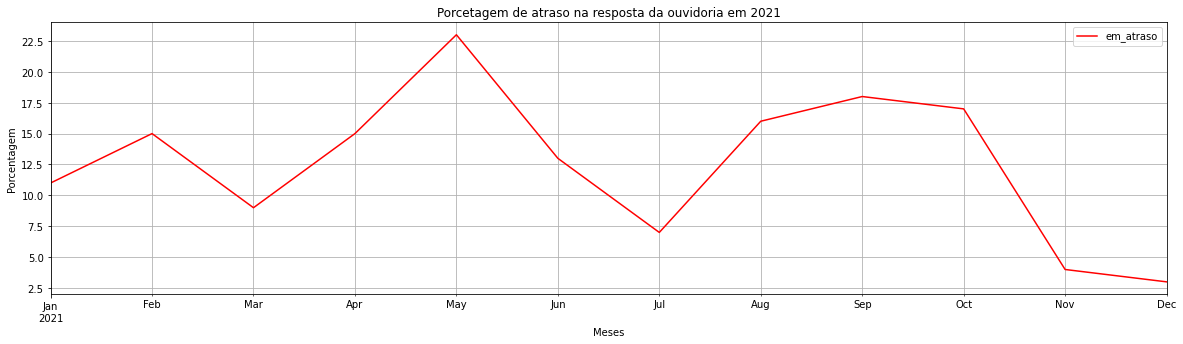

In [18]:
atraso.plot(kind='line',
            figsize = (20, 5),
            color=['r'],
            grid=True,
            title='Porcetagem de atraso na resposta da ouvidoria em 2021',
            xlabel='Meses',
            ylabel='Porcentagem')

O mês com maior pencentual de atraso frente ao número de atendimento foi o mês de maio de 2021. Lembremos que durante este período Fortaleza enfrentava um dos picos da segunda onda de COVID-19. Com o advento da democratização da vacina, já para o fim do ano, percebe-se uma diminuição na pocentagem de atraso nos atendimentos.

CONCLUSÃO<br>
O site [Dados Abertos Fortaleza](https://dados.fortaleza.ce.gov.br/) é bastante promissor quanto a sua disponibilidade de dados a serem explorados. 
Quanto a análise da última questão ainda nos deixa como oportunidade a utilização de machine learning para previsão de atraso em datas futuras. Permitindo aos getores um melhor planejamento de relocação de pessoal, por exemplo.